In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

filterwarnings('ignore')

%store -r df

res = df[~((df.duplicated(['session_id'])) & (df['target_event']==0) )]
res = res.sample(n=200000).reset_index(drop=True)
for col in res.columns:
    res[col] = res[col].fillna('unknown')
    
drop_features=['session_id', 'client_id', 'visit_number', 'device_model', 'device_screen_resolution', 'utm_keyword']# 'visit_time'
res = res.drop(drop_features, axis=1)

In [2]:
def view_occupancy(df):
    length = len(df)
    dic = dict()
    for col in df.columns:
        percent_filled = (length-df[col].isna().sum())/length
        dic[col] = percent_filled

    dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    for k, v in dic:
        print('{}: {:.3f}%, {}'.format(k, v*100, df[k].isna().sum()))

view_occupancy(res)

visit_date: 100.000%, 0
visit_time: 100.000%, 0
utm_source: 100.000%, 0
utm_medium: 100.000%, 0
utm_campaign: 100.000%, 0
utm_adcontent: 100.000%, 0
device_category: 100.000%, 0
device_os: 100.000%, 0
device_brand: 100.000%, 0
device_browser: 100.000%, 0
geo_country: 100.000%, 0
geo_city: 100.000%, 0
target_event: 100.000%, 0


In [3]:
def change_feature(x):
    grouped = res.groupby([x])['target_event'].mean().to_frame().reset_index()
    res[x]=res[x].apply(lambda a: grouped.loc[grouped[x]==a, 'target_event'].iloc[0])
    res[x]=res[x].astype(np.float64)

In [4]:
res['visit_date'] = pd.to_datetime(res['visit_date'])
res['month'] = res['visit_date'].apply(lambda x: int(x.month))
res = res.drop(['visit_date'], axis=1)

res['visit_time'] = pd.to_datetime(res['visit_time'])
res['hour'] = res['visit_time'].apply(lambda a: np.int8(a.hour))
res = res.drop(['visit_time'], axis=1)
# gr_month = res.groupby(['month'])['target_event'].mean().to_frame().reset_index()

In [5]:
# source_features = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
#                    'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
# res['utm_source'] = res['utm_source'].fillna('0')
# res['utm_source'] = res['utm_source'].apply(lambda x: 1 if x in source_features else 0).astype(np.int8)

In [6]:
# gr_source = res.groupby(['utm_source'])['target_event'].mean().to_frame().reset_index()
# res['utm_source'] = res['utm_source'].apply(lambda a: gr_source.loc[_source['utm_source']==a, 'target_event'].iloc[0])

# change_feature('utm_source')
# change_feature('utm_medium')
# change_feature('utm_campaign')
# change_feature('utm_adcontent')
# change_feature('utm_keyword')
# change_feature('device_category')
# change_feature()
cat_features = res.select_dtypes(include=['string', 'object', 'bool']).columns.tolist()
for feature in cat_features:
    change_feature(feature)
change_feature('month')
# change_feature('hour')

In [7]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   utm_source       200000 non-null  float64
 1   utm_medium       200000 non-null  float64
 2   utm_campaign     200000 non-null  float64
 3   utm_adcontent    200000 non-null  float64
 4   device_category  200000 non-null  float64
 5   device_os        200000 non-null  float64
 6   device_brand     200000 non-null  float64
 7   device_browser   200000 non-null  float64
 8   geo_country      200000 non-null  float64
 9   geo_city         200000 non-null  float64
 10  target_event     200000 non-null  int64  
 11  month            200000 non-null  float64
 12  hour             200000 non-null  int8   
dtypes: float64(11), int64(1), int8(1)
memory usage: 18.5 MB


<AxesSubplot:>

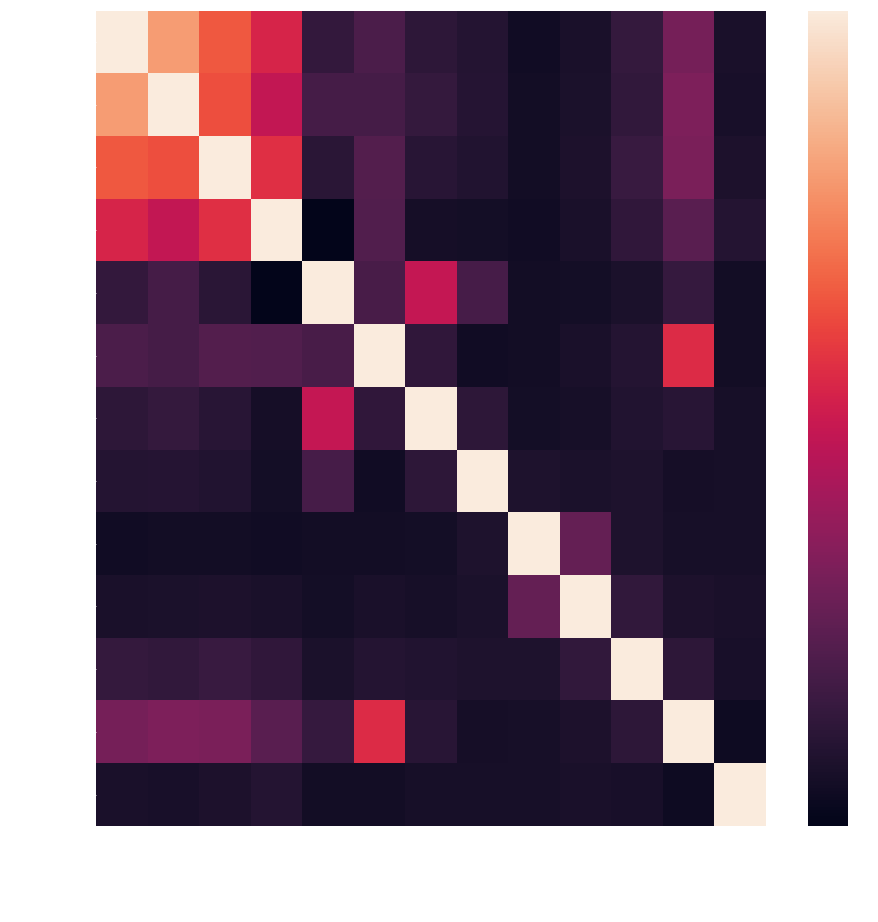

In [8]:
fit, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(res.corr(), ax=ax)

In [10]:
corr_matrix = res.corr()
corr_matrix["target_event"].sort_values(ascending=False)

target_event       1.000000
utm_campaign       0.093668
utm_source         0.084335
geo_city           0.073570
utm_medium         0.072204
utm_adcontent      0.069712
month              0.061311
device_os          0.036588
device_brand       0.029891
geo_country        0.021447
device_browser     0.021417
device_category    0.013792
hour               0.001771
Name: target_event, dtype: float64